<div style="text-align:center">
    <img title="Contest title" alt="An image show Kaggle's contest title" src="./figures/contest_title.png">

<!-- [image source](https://www.google.com/search?q=Google+Analytics+Customer+Revenue+Prediction+image&sca_esv=592634044&tbm=isch&sxsrf=AM9HkKlftHgD8SLQdTaxoZl26nouayB7dg:1703109603032&source=lnms&sa=X&ved=2ahUKEwi2ypvXgZ-DAxX_jGMGHRMoAUIQ_AUoAXoECAEQAw&biw=1707&bih=809&dpr=1.5#imgrc=uoakpuQba4-QtM) -->
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  ƒê·ªí √ÅN CU·ªêI K·ª≤ - L·∫¨P TR√åNH CHO KHOA H·ªåC D·ªÆ LI·ªÜU
</div>

<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  <ins>Giai ƒëo·∫°n 3</ins>: Ph√¢n t√≠ch Kh√°m ph√° D·ªØ li·ªáu (EDA)
</div>

---
#

<div style="font-family: american typewriter, serif; line-height: 1.5; word-spacing: 4px;">

# **M·ª§C L·ª§C**

</div>

[**0. C√ÅC TH∆Ø VI·ªÜN C·∫¶N S·ª¨ D·ª§NG**](#0)<br />
[**1. ƒê·ªåC D·ªÆ LI·ªÜU ƒê√É ƒê∆Ø·ª¢C L√ÄM S·∫†CH T·ª™ FILE**](#1)<br />
[**2. ƒê∆ØA RA C√ÅC C√ÇU H·ªéI C·∫¶N TR·∫¢ L·ªúI C√ôNG V·ªöI L·ª¢I √çCH KHI TR·∫¢ L·ªúI C√ÇU H·ªéI ƒê√ì**](#2)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 1**](#q1_q)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 2**](#q2_q)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 3**](#q3_q)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 4**](#q4_q)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 5**](#q5_q)<br />
[**3. TI·ªÄN X·ª¨ L√ù V√Ä PH√ÇN T√çCH D·ªÆ LI·ªÜU ƒê·ªÇ TR·∫¢ L·ªúI T·ª™NG C√ÇU H·ªéI**](#3)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 1**](#q1_a)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 2**](#q2_a)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 3**](#q3_a)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 4**](#q4_a)<br />
&emsp;&emsp;‚óè [**C√¢u h·ªèi 5**](#q5_a)<br />

---
#

<div style="font-family: american typewriter, serif; line-height: 1.5; word-spacing: 4px;">

# **0. C√ÅC TH∆Ø VI·ªÜN C·∫¶N S·ª¨ D·ª§NG** <a class="anchor" id="0"></a>

</div>

In [1]:
# Common libraries
import numpy as np
import pandas as pd
import re
import json

# Seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
sns.set()

# Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

init_notebook_mode(connected=True)

---
#

<div style="font-family: american typewriter, serif; line-height: 1.5; word-spacing: 4px;">

# **1. ƒê·ªåC D·ªÆ LI·ªÜU ƒê√É ƒê∆Ø·ª¢C L√ÄM S·∫†CH T·ª™ FILE** <a class="anchor" id="1"></a>

</div>

In [2]:
cleaned_df = pd.read_csv("../data/processed/train_preprocessed.csv")

In [3]:
# TEST
cleaned_df.sample(n=5)

channelGrouping        date  visitNumber device.browser  \
678093  Organic Search  2017-07-13            1         Chrome   
863973  Organic Search  2017-03-26            1         Chrome   
642960     Paid Search  2017-02-09            1         Chrome   
263171  Organic Search  2016-12-03            1         Chrome   
378517  Organic Search  2016-12-07            1         Safari   

       device.operatingSystem  device.isMobile device.deviceCategory  \
678093                Windows            False               desktop   
863973                Android             True                mobile   
642960                Windows            False               desktop   
263171                    iOS             True                mobile   
378517                    iOS             True                tablet   

       geoNetwork.continent geoNetwork.subContinent geoNetwork.country  ...  \
678093               Europe          Western Europe             France  ...   
863973                 Asia           Southern Asia              India  ...   
642960             Americas        Northern America      United States  ...   
263171             Americas        Northern America      United States  ...   
378517                 Asia           Southern Asia              India  ...   

       totals.newVisits totals.transactionRevenue  trafficSource.source  \
678093             True                       0.0                google   
863973             True                       0.0                google   
642960             True                       0.0                google   
263171             True                       0.0                google   
378517             True                       0.0                google   

        trafficSource.medium  trafficSource.isTrueDirect  date.day  date.year  \
678093               organic                       False        13       2017   
863973               organic                       False        26       2017   
642960                   cpc                       False         9       2017   
263171               organic                       False         3       2016   
378517               organic                       False         7       2016   

       date.month date.weekDay  date.weekOfYear  
678093          7            3               28  
863973          3            6               12  
642960          2            3                6  
263171         12            5               48  
378517         12            2               49  

[5 rows x 25 columns]

In [4]:
# TEST
cleaned_df.shape

(903653, 25)

Sau khi c√≥ c√°i nh√¨n t·ªïng qu√°t v·ªÅ d·ªØ li·ªáu, ta s·∫Ω ƒë∆∞a ra m·ªôt v√†i c√¢u h·ªèi m√† c√≥ th·ªÉ tr·∫£ l·ªùi b·∫±ng c√°ch ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ c√≥ c√°i nh√¨n s√¢u s·∫Øc h∆°n v·ªÅ t·∫≠p d·ªØ li·ªáu m√† ta ƒëang l√†m vi·ªác.

---
#

<div style="font-family: american typewriter, serif; line-height: 1.5; word-spacing: 4px;">

# **2. ƒê∆ØA RA C√ÅC C√ÇU H·ªéI C·∫¶N TR·∫¢ L·ªúI C√ôNG V·ªöI L·ª¢I √çCH KHI TR·∫¢ L·ªúI C√ÇU H·ªéI ƒê√ì** <a class="anchor" id="2"></a>

</div>

<!-- ƒê∆∞a ra c√°c c√¢u h·ªèi c·∫ßn tr·∫£ l·ªùi c√πng v·ªõi l·ª£i √≠ch khi tr·∫£ l·ªùi c√¢u h·ªèi ƒë√≥ -->

### <a class="anchor" id="q1_q"></a><ins>**C√¢u h·ªèi 1**</ins>: T·ªâ l·ªá chi ti√™u c·ªßa m·ªói qu·ªëc gia so v·ªõi t·ªïng qu·ªëc gia v√† t·ªâ l·ªá s·ªë l·∫ßn mua c·ªßa t·ª´ng qu·ªëc gia so v·ªõi t·ªïng qu·ªëc gia nh∆∞ th·∫ø n√†o? 

**L·ª£i √≠ch**: Tr·∫£ l·ªùi c√¢u h·ªèi tr√™n s·∫Ω gi√∫p ta ƒë√°nh gi√° ƒë∆∞·ª£c c√°c qu·ªëc gia c√≥ l∆∞·ª£ng chi ti√™u l·ªõn c≈©ng nh∆∞ c√°c qu·ªëc gia c√≥ s·ªë l∆∞·ª£ng mua nhi·ªÅu, qua ƒë√≥ gi√∫p c√≥ chi·∫øn l∆∞·ª£c qu·∫£ng c√°o t·ªët h∆°n, t·∫≠p trung v√†o c√°c khu v·ª±c c√≥ s·ªë l∆∞·ª£ng mua l·ªõn c≈©ng nh∆∞ tƒÉng s·ªë l∆∞·ª£ng mua c·ªßa khu v·ª±c ƒë√≥ l√™n.

‚≠ê[<b><i>Tr·∫£ l·ªùi c√¢u h·ªèi 1</i></b>](#q1_a)

### <a class="anchor" id="q2_q"></a><ins>**C√¢u h·ªèi 2**</ins>: C√°c ki·ªÉu ti·∫øp c·∫≠n kh√°c nhau ·∫£nh h∆∞·ªüng nh∆∞ th·∫ø n√†o ƒë·∫øn s·ªë ti·ªÅn chi ti√™u v√† s·ªë l·∫ßn chi ti√™u c·ªßa ng∆∞·ªùi d√πng? 

**L·ª£i √≠ch**: Tr·∫£ l·ªùi c√¢u h·ªèi tr√™n s·∫Ω gi√∫p ch√∫ng ta ƒë√°nh gi√° ƒë∆∞·ª£c s·ª± ·∫£nh h∆∞·ªüng c·ªßa c√°ch th·ª©c ti·∫øp c·∫≠n c·ªßa kh√°ch h√†ng v√† s·ª± chi ti√™u c·ªßa kh√°ch h√†ng; qua ƒë√≥ c√≥ th·ªÉ c√≥ nh·ªØng ∆∞u ƒë√£i ƒë·∫∑c bi·ªát cho nh·ªØng ph∆∞∆°ng th·ª©c n√†y.

‚≠ê[<b><i>Tr·∫£ l·ªùi c√¢u h·ªèi 2</i></b>](#q2_a)

### <a class="anchor" id="q3_q"></a><ins>**C√¢u h·ªèi 3**</ins>: Li·ªáu ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng chi ti√™u nhi·ªÅu h∆°n khi ti·∫øp t·ª•c xem c√°c s·∫£n ph·∫©m ƒë∆∞·ª£c li√™n k·∫øt ƒë·∫øn s·∫£n ph·∫©m hi·ªán t·∫°i kh√¥ng? 

**L·ª£i √≠ch**: Tr·∫£ l·ªùi c√¢u h·ªèi tr√™n s·∫Ω gi√∫p ch√∫ng ta ƒë√°nh gi√° ƒë∆∞·ª£c t√¢m l√≠ chi ti√™u c·ªßa kh√°c h√†ng qua ƒë√≥ c√≥ th·ªÉ c√≥ nh·ªØng ∆∞u ƒë√£i ƒë·∫∑c bi·ªát c≈©ng nh∆∞ vi·ªác li√™n k·∫øt c√°c s·∫£n ph·∫©m v·ªõi nhau.

‚≠ê[<b><i>Tr·∫£ l·ªùi c√¢u h·ªèi 3</i></b>](#q3_a)

### <a class="anchor" id="q4_q"></a><ins>**C√¢u h·ªèi 4**</ins>: V√†o kho·∫£ng th·ªùi gian n√†o th√¨ ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng truy c·∫≠p th∆∞·ªùng xuy√™n v√† s·∫µn s√†ng chi ti√™u nhi·ªÅu h∆°n ƒë·ªÉ mua s·∫Øm c√°c s·∫£n ph·∫©m t·ª´ c·ª≠a h√†ng c·ªßa Google? 

**Tr·∫£ l·ªùi c√¢u h·ªèi n√†y s·∫Ω gi√∫p ch√∫ng ta**: hi·ªÉu r√µ h∆°n v·ªÅ xu h∆∞·ªõng chi ti√™u c·ªßa ng∆∞·ªùi d√πng v√† nh·ªØng th·ªùi ƒëi·ªÉm ti·ªÅm nƒÉng m√† ng∆∞·ªùi d√πng c√≥ kh·∫£ nƒÉng chi ti√™u nhi·ªÅu h∆°n ƒë·ªÉ mua s·∫£n ph·∫©m t·ª´ c·ª≠a h√†ng. ƒê√¢y l√† th√¥ng tin v√¥ c√πng c·∫ßn thi·∫øt gi√∫p c√°c chi·∫øn d·ªãch marketing d·ªÖ d√†ng ti·∫øp c·∫≠n v√† thu h√∫t ƒë∆∞·ª£c s·ª± ch√∫ √Ω t·ª´ ng∆∞·ªùi d√πng, n√¢ng cao kh·∫£ nƒÉng tƒÉng doanh thu cho c·ª≠a h√†ng.

‚≠ê[<b><i>Tr·∫£ l·ªùi c√¢u h·ªèi 4</i></b>](#q4_a)

### <a class="anchor" id="q5_q"></a><ins>**C√¢u h·ªèi 5**</ins>: Ng∆∞·ªùi d√πng th∆∞·ªùng s·ª≠ d·ª•ng thi·∫øt b·ªã v·ªõi c√°c th√¥ng s·ªë k·ªπ thu·∫≠t nh∆∞ th·∫ø n√†o khi truy c·∫≠p v√†o c·ª≠a h√†ng c·ªßa Google? Li·ªáu c√≥ t·ªìn t·∫°i m·ªôt lo·∫°i thi·∫øt b·ªã v·ªõi th√¥ng s·ªë k·ªπ thu·∫≠t ƒë·∫∑c th√π n√†o ƒë√≥ m√† khi s·ª≠ d·ª•ng n√≥, ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng mua h√†ng nhi·ªÅu h∆°n hay kh√¥ng? 

<class style="font-size: 20px;">

> **T√ìM T·∫ÆT**  
> - Tr·∫£ l·ªùi c√¢u h·ªèi n√†y s·∫Ω mang l·∫°i nhi·ªÅu l·ª£i √≠ch:
>
>   + <ins>V·ªõi nh√≥m ph√°t tri·ªÉn ·ª©ng d·ª•ng</ins>: Khi hi·ªÉu r√µ h∆°n v·ªÅ th√≥i quen c·ªßa ng∆∞·ªùi d√πng th√¨ ta c√≥ th·ªÉ t·ªëi ∆∞u h√≥a ·ª©ng d·ª•ng gi√∫p n√¢ng cao tr·∫£i nghi·ªám c·ªßa ng∆∞·ªùi d√πng. ƒê·ªìng th·ªùi gi√∫p ·ª©ng d·ª•ng c√≥ th·ªÉ ti·∫øp c·∫≠n v·ªõi nhi·ªÅu ng∆∞·ªùi d√πng h∆°n...
>
>   + <ins>V·ªõi nh√≥m l√†m chi·∫øn d·ªãch qu·∫£ng c√°o</ins>: Vi·ªác hi·ªÉu r√µ h∆°n v·ªÅ ng∆∞·ªùi d√πng gi√∫p ta x√°c ƒë·ªãnh kh√°ch h√†ng ti·ªÅm nƒÉng hi·ªáu qu·∫£ h∆°n. Khi n√†y, ta c√≥ th·ªÉ t·ªëi ∆∞u h√≥a chi·∫øn d·ªãch qu·∫£ng c√°o, ch√≠nh s√°ch ∆∞u ƒë√£i d·ª±a v√†o th√¥ng tin thi·∫øt b·ªã c·ªßa h·ªç.

</class>

(Ghi ch√∫: ƒê√¢y l√† c√°c th√¥ng tin m√† c√≥ th·ªÉ BI·∫æT ƒê∆Ø·ª¢C ngay t·ª´ khi ng∆∞·ªùi d√πng b·∫Øt ƒë·∫ßu phi√™n truy c·∫≠p c·ªßa m√¨nh.)

**Tr·∫£ l·ªùi c√¢u h·ªèi n√†y s·∫Ω mang l·∫°i l·ª£i √≠ch cho ch√∫ng ta ·ªü nhi·ªÅu kh√≠a c·∫°nh kh√°c nhau, bao g·ªìm**:
- <ins>V·ªõi nh√≥m ph√°t tri·ªÉn ·ª©ng d·ª•ng (website)</ins>: Khi ta hi·ªÉu r√µ h∆°n v·ªÅ th√≥i quen, nhu c·∫ßu c·ªßa ng∆∞·ªùi d√πng th√¨ ta c√≥ th·ªÉ ph√°t tri·ªÉn, t·ªëi ∆∞u h√≥a ·ª©ng d·ª•ng c·ªßa m√¨nh ƒë·ªÉ n√≥ ch·∫°y t·ªët tr√™n c√°c thi·∫øt b·ªã ph·ªï bi·∫øn. ƒêi·ªÅu n√†y gi√∫p n√¢ng cao tr·∫£i nghi·ªám s·ª≠ d·ª•ng c·ªßa ng∆∞·ªùi d√πng, v√† ƒë·ªìng th·ªùi gi√∫p ·ª©ng d·ª•ng c·ªßa ch√∫ng ta c√≥ th·ªÉ ti·∫øp c·∫≠n v·ªõi nhi·ªÅu ng∆∞·ªùi d√πng h∆°n.

- <ins>V·ªõi nh√≥m l√†m chi·∫øn d·ªãch qu·∫£ng c√°o</ins>: Vi·ªác hi·ªÉu r√µ h∆°n v·ªÅ ƒë·ªëi t∆∞·ª£ng m·ª•c ti√™u c·ªßa m√¨nh s·∫Ω gi√∫p ta c√≥ th·ªÉ x√°c ƒë·ªãnh c√°c kh√°ch h√†ng ti·ªÅm nƒÉng hi·ªáu qu·∫£ h∆°n. Khi n√†y, ta c√≥ th·ªÉ t·ªëi ∆∞u h√≥a chi·∫øn d·ªãch qu·∫£ng c√°o, ƒëi·ªÅu ch·ªânh c√°c ch√≠nh s√°ch ∆∞u ƒë√£i d·ª±a v√†o th√¥ng tin thi·∫øt b·ªã c·ªßa ng∆∞·ªùi d√πng. ƒêi·ªÅu n√†y gi√∫p t·ªëi ƒëa h√≥a l·ª£i nhu·∫≠n t·ª´ c√πng m·ªôt ngu·ªìn v·ªën nh·∫•t ƒë·ªãnh.

‚≠ê[<b><i>Tr·∫£ l·ªùi c√¢u h·ªèi 5</i></b>](#q5_a)

---
#

<div style="font-family: american typewriter, serif; line-height: 1.5; word-spacing: 4px;">

# **3. TI·ªÄN X·ª¨ L√ù V√Ä PH√ÇN T√çCH D·ªÆ LI·ªÜU ƒê·ªÇ TR·∫¢ L·ªúI T·ª™NG C√ÇU H·ªéI** <a class="anchor" id="3"></a>

</div>

<!-- Sau ƒë√≥, ta s·∫Ω ti·ªÅn x·ª≠ l√Ω v√† ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi t·ª´ng c√¢u h·ªèi -->

### <a class="anchor" id="q1_a"></a><ins>**C√¢u h·ªèi 1**</ins>: T·ªâ l·ªá chi ti√™u c·ªßa m·ªói qu·ªëc gia so v·ªõi t·ªïng qu·ªëc gia v√† t·ªâ l·ªá s·ªë l·∫ßn mua c·ªßa t·ª´ng qu·ªëc gia so v·ªõi t·ªïng qu·ªëc gia nh∆∞ th·∫ø n√†o?

#### Th·ª±c hi·ªán

V·ªõi m·ªói qu·ªëc gia t√≠nh:

s1 (t·ªâ l·ªá s·ªë ti·ªÅn chi) = s·ªë ti·ªÅn qu·ªëc gia chi / s·ªë ti·ªÅn to√†n th·∫ø gi·ªõi chi

s2 (t·ªâ l·ªá s·ªë l·∫ßn truy c·∫≠p) = s·ªë l·∫ßn truy c·∫≠p c·ªßa qu·ªëc gia / s·ªë l·∫ßn truy c·∫≠p to√†n th·∫ø gi·ªõi

s3 (t·ªâ l·ªá s·ªë l·∫ßn mua) = s·ªë l·∫ßn mua h√†ng c·ªßa qu·ªëc gia / s·ªë l·∫ßn mua h√†ng c·ªßa th·∫ø gi·ªõi


t·ªâ l·ªá 1 = s1/s2

t·ªâ l·ªá 2 = s3/s2

Sau ƒë√≥ ta v·∫Ω hai geochart th·ªÉ hi·ªán 2 t·ªâ l·ªá tr√™n cho t·ª´ng qu·ªëc gia, v√† v·∫Ω 2 bar chart cho top 5 qu·ªëc gia cho t·ª´ng t·ªâ l·ªá. 

#### Ti·ªÅn x·ª≠ l√Ω (n·∫øu c·∫ßn):

#### Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi c√¢u h·ªèi

In [5]:
label = 'geoNetwork.country'

# T·∫°o m·ªôt DataFrame m·ªõi ch·ªâ ch·ª©a c·ªôt 'totals.transactionRevenue' v√† 'geoNetwork.country'
subset_df = cleaned_df[[label, 'totals.transactionRevenue']].copy()

# T√≠nh t·ªïng theo nh√≥m 'geoNetwork.country' v√† t√≠nh t·ªïng t·ªïng doanh thu
grouped = subset_df.groupby(label)['totals.transactionRevenue']
sum_data = grouped.sum().fillna(0)
total_revenue = sum_data.sum()

# T√≠nh t·ªâ l·ªá theo t·ª´ng ƒëi·ªÅu ki·ªán
s1 = sum_data / total_revenue
s2 = grouped.count() / len(subset_df)
s3 = grouped.apply(lambda x: (x > 0).sum()) / subset_df['totals.transactionRevenue'].gt(0).sum()

# T√≠nh c√°c gi√° tr·ªã cu·ªëi c√πng v√† l∆∞u v√†o DataFrame values
t1 = s1 / s2
t2 = s3 / s2
values = pd.DataFrame({'Country': s1.index, 'T1': t1.values, 'T2': t2.values})

/tmp/ipykernel_24421/1953471943.py:18: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



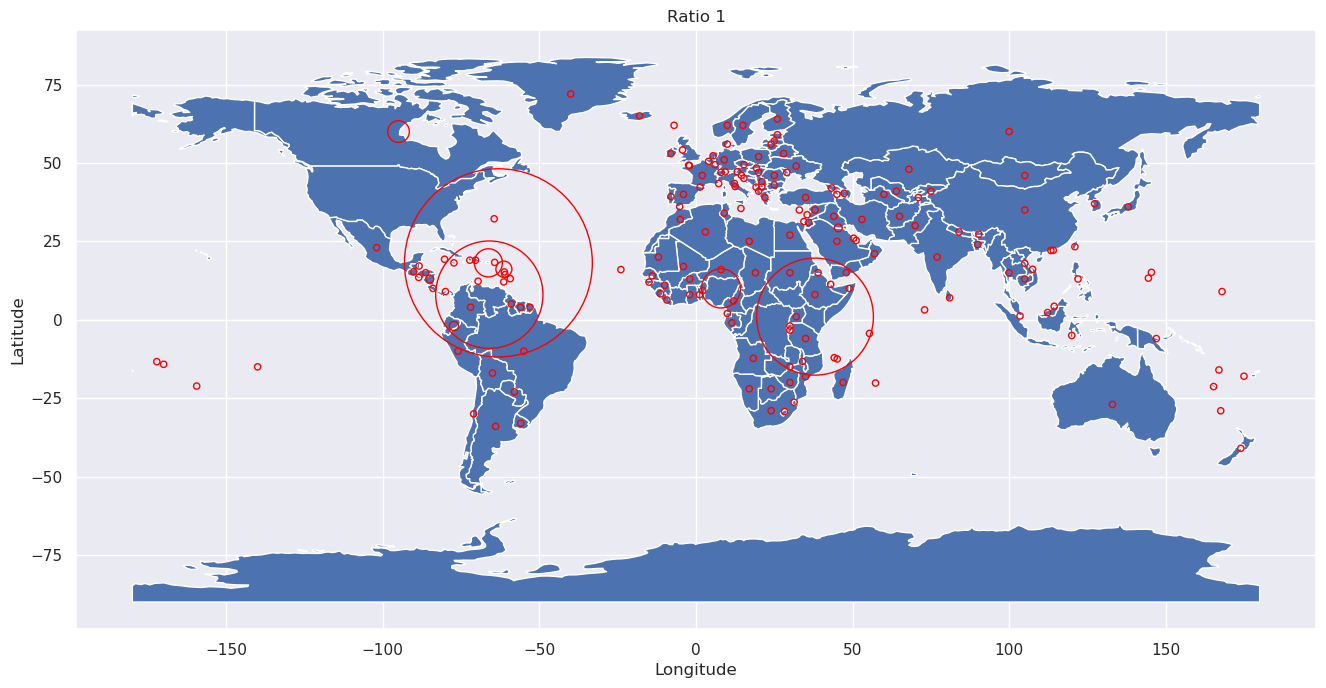

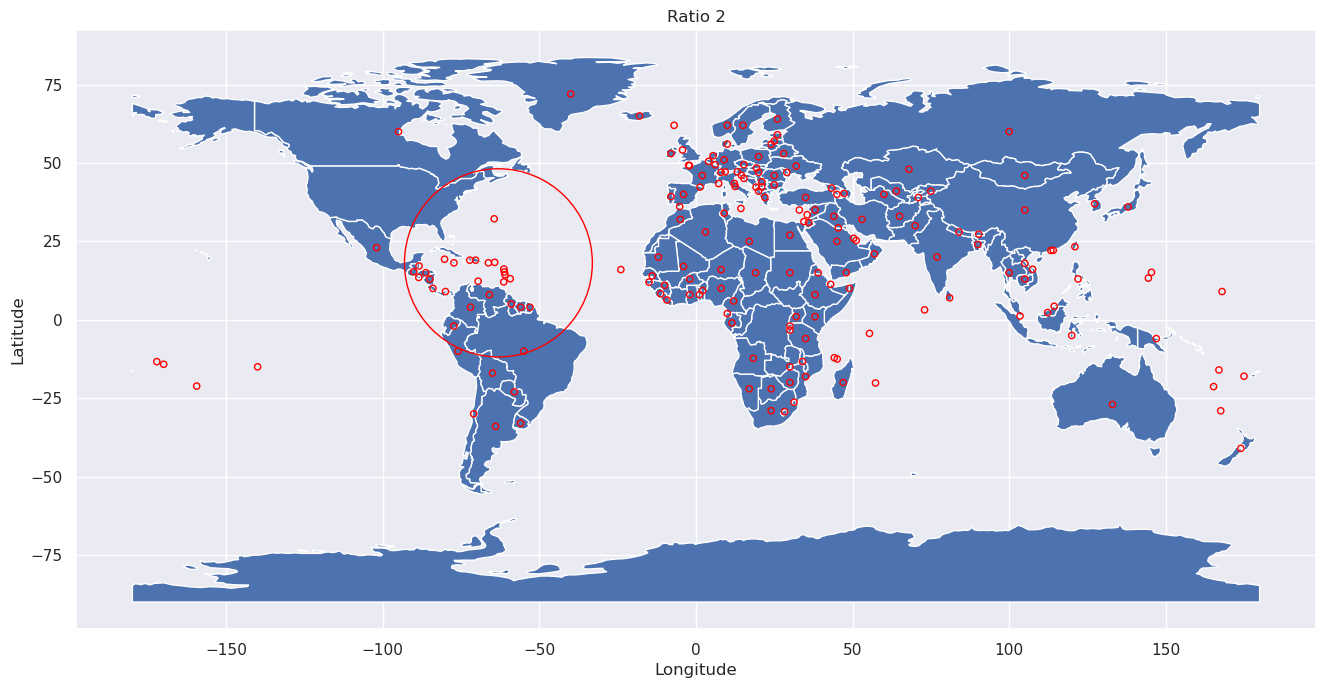

In [6]:
#V·∫Ω 2 bi·ªÉu ƒë·ªì

money_df = values.copy()
money_df.columns = ['Country', 'Ratio 1', 'Ratio 2']

with open('../data/external/coord.json') as file:
    coordinates = json.load(file)

coord_data = {
    'Country': list(coordinates['lat'].keys()),
    'Latitude': list(coordinates['lat'].values()),
    'Longitude': list(coordinates['long'].values())
}

coord_df = pd.DataFrame(coord_data)
merged_df = pd.merge(money_df, coord_df, on='Country')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


# Ratio 1
m_ratio_1 = np.max(merged_df['Ratio 1'])
fig, ax = plt.subplots(figsize=(16, 12))
world.plot(ax=ax)
for ind in merged_df.index:
    circle = plt.Circle((merged_df['Longitude'][ind], merged_df['Latitude'][ind]), max(merged_df['Ratio 1'][ind] / m_ratio_1 * 30, 1), color='red', fill=False)
    ax.add_patch(circle)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ratio 1')
plt.grid(True)
plt.show()
# Ratio 2
m_ratio_2 = np.max(merged_df['Ratio 2'])
fig, ax = plt.subplots(figsize=(16, 12))
world.plot(ax=ax)
for ind in merged_df.index:
    circle = plt.Circle((merged_df['Longitude'][ind], merged_df['Latitude'][ind]), max(merged_df['Ratio 2'][ind] / m_ratio_2 * 30, 1), color='red', fill=False)
    ax.add_patch(circle)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ratio 2')
plt.grid(True)
plt.show()

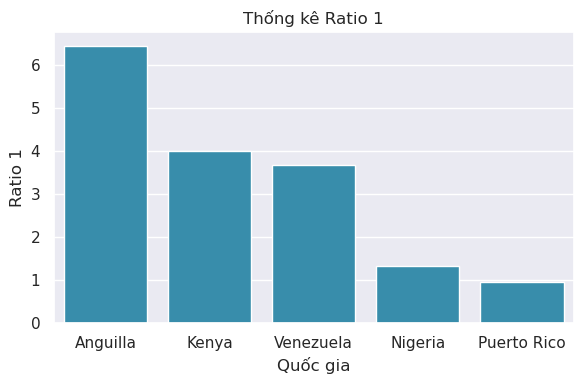

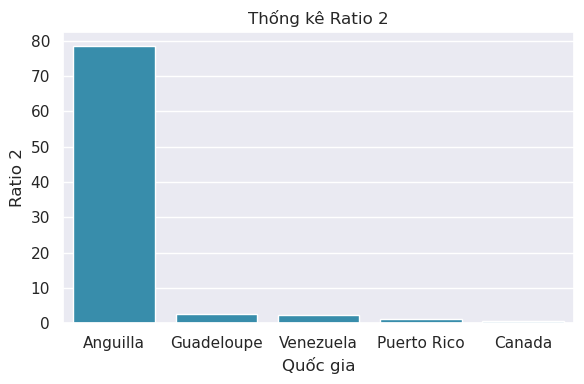

In [7]:
#V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho c√°c qu·ªëc gia c√≥ t·ªâ l√™ cao nh·∫•t
fields = ['Ratio 1', 'Ratio 2']

# Create subplots for each field
for field in fields:
    # Sort values for the current field in descending order
    sorted_df = merged_df.sort_values(by=field, ascending=False).head(5)

    # Create bar plot using Seaborn
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Country', y=field, data=sorted_df, color='#2596be')
    plt.title(f'Th·ªëng k√™ {field}')
    plt.xlabel('Qu·ªëc gia')
    plt.ylabel(field)
    plt.tight_layout()
    plt.show()

> **Nh·∫≠n x√©t**: Ta th·∫•y ƒë∆∞·ª£c r·∫±ng ch·ªâ c√≥ m·ªôt s·ªë √≠t qu·ªëc gia c√≥ t·ªâ l·ªá chi ti√™u l·ªõn v√† ch·ªâ c√≥ m·ªôt qu·ªëc gia c√≥ t·ªâ l·ªá l·∫ßn mua nhi·ªÅu. Anguilla l√† qu·ªëc gia c√≥ c·∫£ 2 t·ªâ l·ªá ·ªü m·ª©c l·ªõn h∆°n r·∫•t nhi·ªÅu so v·ªõi to√†n th·∫ø gi·ªõi. Ngo√†i ra m·ªôt s·ªë qu·ªëc gia nh∆∞: Kenya, Venezuela, Nigeria, Puerto Rico c√≥ t·ªâ l·ªá chi ti√™u r·∫•t l·ªõn so v·ªõi t·ªâ l·ªá s·ªë l·∫ßn mua.

---

### <a class="anchor" id="q2_a"></a><ins>**C√¢u h·ªèi 2**</ins>: C√°c ki·ªÉu ti·∫øp c·∫≠n kh√°c nhau ·∫£nh h∆∞·ªüng nh∆∞ th·∫ø n√†o ƒë·∫øn s·ªë ti·ªÅn chi ti√™u v√† s·ªë l·∫ßn chi ti√™u c·ªßa ng∆∞·ªùi d√πng?

#### Th·ª±c hi·ªán

V·ªõi m·ªói qu·ªëc gi√° tr·ªã ri√™ng bi·ªát trong 3 c·ªôt: 'trafficSource.source', 'trafficSource.medium', 'trafficSource.isTrueDirect' ta t√≠nh:

s1 (t·ªâ l·ªá s·ªë ti·ªÅn chi) = s·ªë ti·ªÅn gi√° tr·ªã chi / s·ªë ti·ªÅn to√†n th·∫ø gi·ªõi chi

s2 (t·ªâ l·ªá s·ªë l·∫ßn truy c·∫≠p) = s·ªë l·∫ßn truy c·∫≠p c·ªßa gi√° tr·ªã / s·ªë l·∫ßn truy c·∫≠p to√†n th·∫ø gi·ªõi

s3 (t·ªâ l·ªá s·ªë l·∫ßn mua) = s·ªë l·∫ßn mua h√†ng c·ªßa gi√° tr·ªã / s·ªë l·∫ßn mua h√†ng c·ªßa th·∫ø gi·ªõi


t·ªâ l·ªá 1 = s1/s2

t·ªâ l·ªá 2 = s3/s2

Sau ƒë√≥ ta v·∫Ω 2 bar chart cho top 5 gi√° tr·ªã cho t·ª´ng t·ªâ l·ªá. 

#### Ti·ªÅn x·ª≠ l√Ω (n·∫øu c·∫ßn)

#### Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi c√¢u h·ªèi

Source


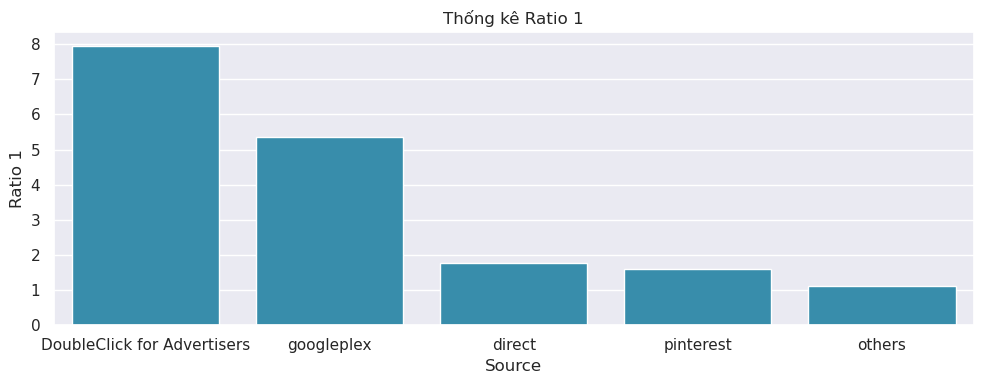

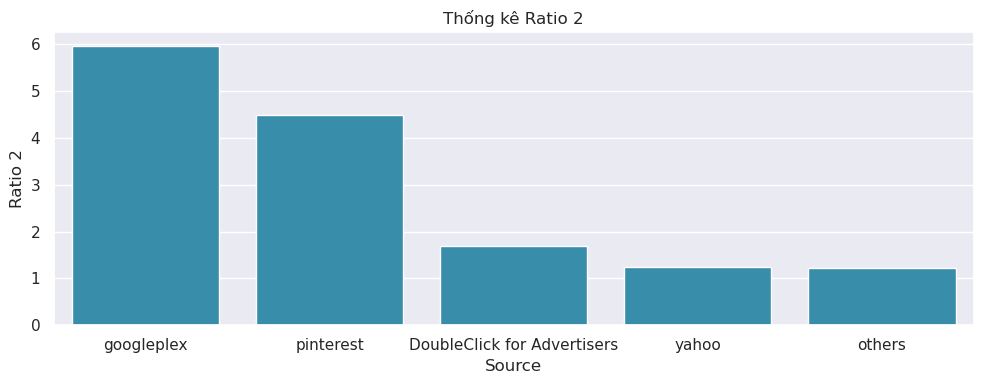

Medium


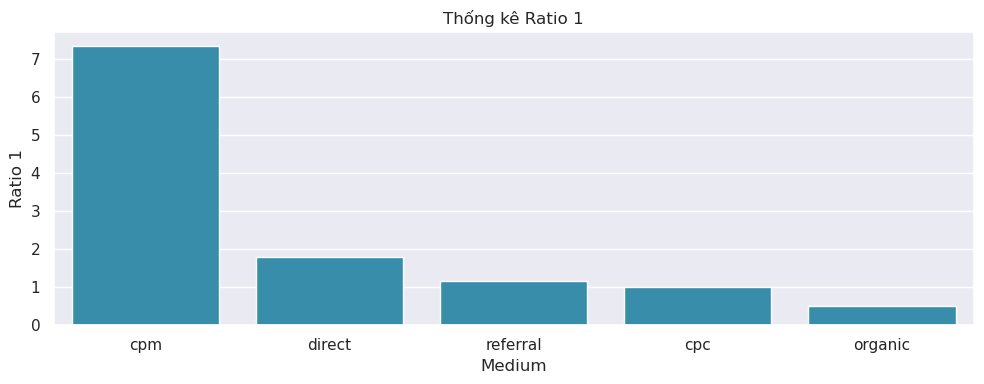

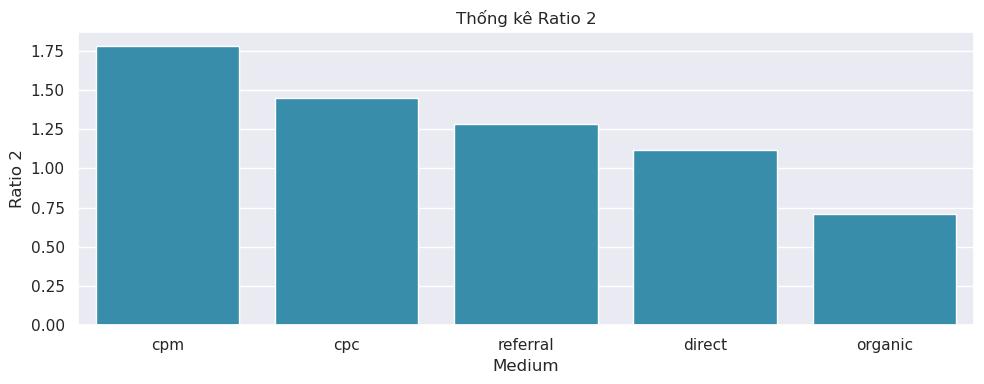

In [8]:
labels = ['trafficSource.source', 'trafficSource.medium']

trafficSource_df = []

for label in labels:
    l = cleaned_df[label].copy()
    unis = l.unique()
    data = cleaned_df['totals.transactionRevenue'].copy()

    values = []

    for uni in unis:
        s1 = sum(data[l == uni]) / sum(data)
        s2 = sum(l == uni) / len(l)
        s3 = sum((l == uni) & (data > 0)) / sum(data > 0)
        t1 = s1 / s2
        t2 = s3 / s2
        values.append((uni, t1, t2))
    trafficSource_df.append(pd.DataFrame(values))

trafficSource_df[0].columns = ['Source', 'Ratio 1', 'Ratio 2']
trafficSource_df[1].columns = ['Medium', 'Ratio 1', 'Ratio 2']

fields = ['Ratio 1', 'Ratio 2']

# Create subplots for each field
for df in trafficSource_df:
    print(df.columns[0])
    for field in fields:
        # Sort values for the current field in descending order
        sorted_df = df.sort_values(by=field, ascending=False).head(5)

        # Create bar plot using Seaborn
        plt.figure(figsize=(10, 4))
        sns.barplot(x=df.columns[0], y=field, data=sorted_df, color='#2596be')
        plt.title(f'Th·ªëng k√™ {field}')
        plt.xlabel(df.columns[0])
        plt.ylabel(field)
        plt.tight_layout()
        plt.show()

> **Nh·∫≠n x√©t**:
> * Source: c√≥ s·ª± kh√°c bi·ªát l·ªõn gi·ªØa 2 t·ªâ l·ªá, Double clicks for advertise c√≥ t·ªâ l·ªá s·ªë ti·ªÅn chi ti√™u r·∫•t l·ªõn nh∆∞ng t·ªâ l·ªá c·ªßa s·ªë l·∫ßn chi l·∫°i nh·ªè h∆°n ƒë√°ng k·ªá, c√°c kh√°ch h√†ng d√πng ph∆∞∆°ng th·ª©c n√†y c√≥ xu h∆∞·ªõng chi nhi·ªÅu ti·ªÅn cho 1 l·∫ßn chi. Direct source c√≥ t·ªâ l·ªá s·ªë ti·ªÅn chi ti√™u l·ªõn so v·ªõi t·ªâ l·ªá s·ªë l·∫ßn chi ti√™u, t·ªâ l·ªá s·ªë l·∫ßn chi ti√™u c·ªßa ph∆∞∆°ng th·ª©c n√†y c√≤n kh√¥ng n·∫±m trong 5 ph∆∞∆°ng th·ª©c ph·ªï bi·∫øn nh·∫•t, ƒëi·ªÅu n√†y th·ªÉ hi·ªán vi·ªác c√°c chi ti√™u c·ªßa ng∆∞·ªùi d√πng √≠t khi ƒë·∫øn tr·ª±c ti·∫øp t·ª´ vi·ªác h·ªç bi·∫øt tr∆∞·ªõc s·∫£n ph·∫©m c·∫ßn mua v√† th∆∞·ªùng s·∫Ω th√¥ng qua c√°c h√¨nh th·ª©c qu·∫£ng c√°o, t√¨m ki·∫øm.
>
> * Medium: T·ªâ l·ªá v·ªÅ s·ªë l·∫ßn chi ti√™u c√°c c√°c thu·ªôc t√≠nh h√†ng ƒë·∫ßu x·∫•p x·ªâ t∆∞∆°ng t·ª± nhau, thuy nhi√™n t·ªâ l·ªá v·ªÅ s·ªë ti·ªÅn chi ti√™u l·∫°i c√≥ s·ª± ch√™nh l·ªách r·∫•t l·ªõn gi·ªØa cpm v√† c√°c thu·ªôc t√≠nh kh√°c. ƒêi·ªÅu n√†y cho th·∫•y h√¨nh th·ª©c cpm c√≥ hi·ªáu qu√° r·∫•t t·ªët.

---

### <a class="anchor" id="q3_a"></a><ins>**C√¢u h·ªèi 3**</ins>: Li·ªáu ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng chi ti√™u nhi·ªÅu h∆°n khi ti·∫øp t·ª•c xem c√°c s·∫£n ph·∫©m ƒë∆∞·ª£c li√™n k·∫øt ƒë·∫øn s·∫£n ph·∫©m hi·ªán t·∫°i kh√¥ng?

#### Th·ª±c hi·ªán

Ta s·∫Ω v·∫Ω hai bi·ªÉu ƒë·ªì l·∫ßn l∆∞·ª£t th·ªÉ hi·ªán s·ª± t∆∞∆°ng quan gi·ªØa s·ªë trang truy c·∫≠p ƒë·∫øn s·ªë ti·ªÅn chi c≈©ng nh∆∞ kh·∫£ nƒÉng chi ti·ªÅn c·ªßa kh√°c h√†ng.

#### Ti·ªÅn x·ª≠ l√Ω (n·∫øu c·∫ßn)

In [9]:
total_df = cleaned_df[['totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue']].copy()
#create new columns of is_transaction
total_df['totals.is_transaction'] = total_df['totals.transactionRevenue'].apply(lambda x: 1 if x > 0 else 0)

#### Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi c√¢u h·ªèi

<Axes: xlabel='totals.pageviews'>

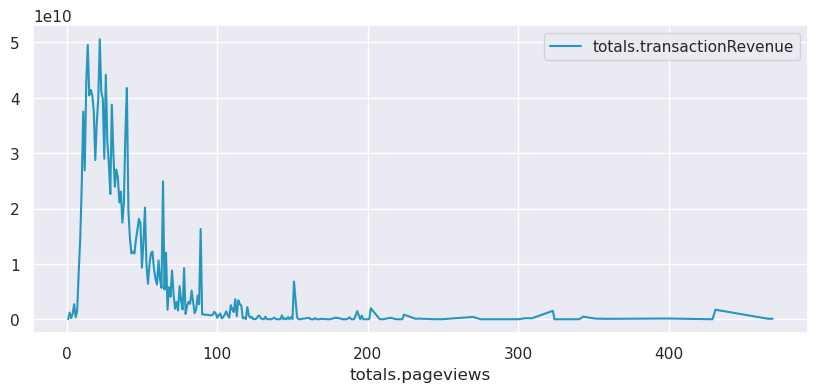

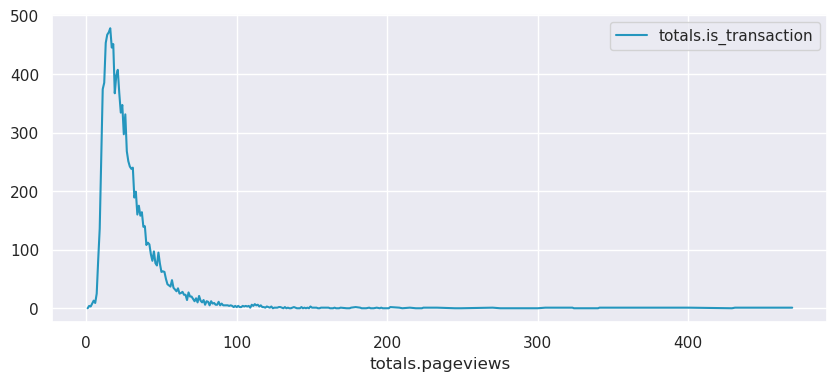

In [10]:
#create a new dataframe groupby total.hits with total.transactionRevenue
df = total_df[['totals.pageviews', 'totals.transactionRevenue', 'totals.is_transaction']].groupby('totals.pageviews').sum().reset_index()
df.plot(x='totals.pageviews', y='totals.transactionRevenue', figsize=(10, 4), color='#2596be')
df.plot(x='totals.pageviews', y='totals.is_transaction', figsize=(10, 4), color='#2596be')

In [11]:
max_page = df[df['totals.transactionRevenue'] == df['totals.transactionRevenue'].max()]['totals.pageviews'].values[0]

print(f'Kh·∫£ nƒÉng mua h√†ng c≈©ng nh∆∞ s·ªë ti·ªÅn chi ƒë·∫°t t·ªëi da khi s·ªë trang web truy c·∫≠p l√† {max_page} l·∫ßn')

Kh·∫£ nƒÉng mua h√†ng c≈©ng nh∆∞ s·ªë ti·ªÅn chi ƒë·∫°t t·ªëi da khi s·ªë trang web truy c·∫≠p l√† 22 l·∫ßn


> **Nh·∫≠n x√©t**: Ta th·∫•y r·∫±ng s·ªë ti·ªÅn chi c≈©ng nh∆∞ kh·∫£ nƒÉng chi ti·ªÅn c·ªßa kh√°c h√†ng tƒÉng m·∫°nh v√† sau ƒë√≥ gi·∫£m nhanh v·ªõi s·ªë trang web m√† h·ªç truy c·∫≠p. Qua ƒë√≥ ta th·∫•y ƒë∆∞·ª£c r·∫±ng kh√°ch h√†ng s·∫Ω c√≥ kh·∫£ nƒÉng mua h√†ng r·∫•t cao n·∫øu h·ªç ti·∫øp t·ª•c truy c·∫≠p ƒë·∫øn nh·ªØng s·∫£n ph·∫©m li√™n quan ƒë·∫øn s·∫£n ph·∫©m hi·ªán t·∫°i. Tuy nhi√™n kh·∫£ nƒÉng n√†y s·∫Ω gi·∫£m ƒë√°ng k·ªÉ n·∫øu nh∆∞ ng∆∞·ªùi d√πng ti·∫øp t·ª•c truy c·∫≠p ƒë·∫øn c√°c s·∫£n ph·∫©m li√™n quan ti·∫øp theo.

---

### <a class="anchor" id="q4_a"></a><ins>**C√¢u h·ªèi 4**</ins>: V√†o kho·∫£ng th·ªùi gian n√†o th√¨ ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng truy c·∫≠p th∆∞·ªùng xuy√™n v√† s·∫µn s√†ng chi ti√™u nhi·ªÅu h∆°n ƒë·ªÉ mua s·∫Øm c√°c s·∫£n ph·∫©m t·ª´ c·ª≠a h√†ng c·ªßa Google?

#### √ù t∆∞·ªüng th·ª±c hi·ªán

- Ta s·∫Ω d√πng c√°c thu·ªôc t√≠nh ph√¢n lo·∫°i ƒë√£ tr√≠ch xu·∫•t t·ª´ c·ªôt `date` trong notebook `02` ƒë·ªÉ tr·∫£ l·ªùi cho c√¢u h·ªèi n√†y.
- V·ªõi m·ªói thu·ªôc t√≠nh m√† ta quan t√¢m, ta s·∫Ω l·∫ßn l∆∞·ª£t th·ª±c hi·ªán 3 b∆∞·ªõc:
    + B∆∞·ªõc 1: Ta th·ª±c hi·ªán th·ªëng k√™ m·ªôt s·ªë gi√° tr·ªã nh∆∞: `t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p`, `s·ªë l·∫ßn truy c·∫≠p c√≥ giao d·ªãch` v√† `t·ªïng gi√° tr·ªã giao d·ªãch` cho m·ªói gi√° tr·ªã trong thu·ªôc t√≠nh m√† ta quan t√¢m.
    + B∆∞·ªõc 2: Ta s·∫Ω s·ª≠ d·ª•ng c√°c bi·ªÉu ƒë·ªì nh∆∞: `bar-chart` ho·∫∑c `line-chart` ƒë·ªÉ so s√°nh c√°c gi√° tr·ªã th·ªëng k√™ b√™n tr√™n gi·ªØa c√°c m·ªëc th·ªùi gian.
    + B∆∞·ªõc 3: Quan s√°t bi·ªÉu ƒë·ªì v√† ƒë∆∞a ra nh·∫≠n x√©t, ƒë·ªìng th·ªùi tr·∫£ l·ªùi c√¢u h·ªèi n√™u tr√™n. 

#### Ti·ªÅn x·ª≠ l√Ω (n·∫øu c·∫ßn)

#### Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√¢u h·ªèi

ƒê·∫ßu ti√™n, ta x√¢y d·ª±ng m·ªôt h√†m ti·ªán √≠ch gi√∫p ƒë∆°n gi·∫£n qu√° tr√¨nh th·ªëng k√™ d·ª±a tr√™n thu·ªôc t√≠nh m√† ta quan t√¢m

In [12]:
def _create_feature_stats(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """Create a dataframe contains: 
        1. Number of visits per unique value in `feature`,
        2. Number of non-zero revenue visits per unique value in `feature` 
        3. Total revenue per unique value in `feature`.
    """
    # Create 3 dataframes
    counts = df[feature].value_counts().to_frame().reset_index()\
                .sort_values(feature).rename(columns={'count': 'visits'})

    non_zero_counts = \
        df.query("`totals.transactionRevenue` > 0")[feature]\
            .value_counts().to_frame().reset_index()\
                .sort_values(feature).rename(columns={'count': 'non_zero_transactions'})
    
    sums = df.groupby(feature)['totals.transactionRevenue'].sum()\
                .to_frame().reset_index().sort_values(feature)

    # Merge 3 dataframes
    merged_df = pd.merge(counts, non_zero_counts, on=feature, how='left')
    merged_df = pd.merge(merged_df, sums, on=feature, how='left')
    
    return merged_df

##### 1. Ph√¢n b·ªë theo `ng√†y trong th√°ng`

In [13]:
# Get some useful statistics from `date.day` column
day_stats = _create_feature_stats(cleaned_df, 'date.day')

# Plot bar charts
BASIC_PLOTLY_CONFIG = dict(
    title_x=0.5, title_font_size=20,
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    coloraxis_showscale=False,
    xaxis_title_font_size=20, xaxis_tickfont_size=16,
    yaxis_title_font_size=20, yaxis_tickfont_size=16,
)
# ====================  For `visits` ==================== 
fig = px.bar(
    day_stats, x="date.day", y="visits",
    color='visits', hover_name='visits',
    labels={'date.day': 'Day', 'visits': '#Visits'},
    color_continuous_scale=px.colors.sequential.Tealgrn,
    height=400, width=800
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Visits by day</b>', 
         xaxis_title='Day of month', yaxis_title='# Visits')
)
iplot(fig)

# ====================  For `non_zero_transactions` ====================
fig = px.bar(
    day_stats, x="date.day", y="non_zero_transactions",
    color='non_zero_transactions', hover_name='non_zero_transactions',
    labels={'date.day':'Day', 'non_zero_transactions':'#Non-zero transactions'},
    color_continuous_scale=px.colors.sequential.Blues,
    height=400, width=800
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Non-zero transactions by day</b>', 
         xaxis_title='Day of month', yaxis_title='# Non-zero transactions')
)
iplot(fig)

# ====================  For `totals.transactionRevenue` ====================
fig = px.bar(
    day_stats, x="date.day", y="totals.transactionRevenue",
    color='totals.transactionRevenue', hover_name='totals.transactionRevenue',
    labels={'date.day': 'Day', 'totals.transactionRevenue': 'Œ£Revenue'},
    color_continuous_scale=px.colors.sequential.Pinkyl,
    height=400, width=800
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Transaction revenue by day</b>', 
         xaxis_title='Day of month', yaxis_title='Œ£ Revenue')
)
# iplot(fig)
fig.show()

> üí≠ <u>**Nh·∫≠n x√©t**</u>: 
> * V·ªÅ t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p: Nh√¨n chung, t·ªïng s·ªë l∆∞·ª£ng truy c·∫≠p c·ªßa ng∆∞·ªùi d√πng v√†o GStore l√† kh√¥ng qu√° kh√°c bi·ªát gi·ªØa c√°c ng√†y trong th√°ng. Ta th·∫•y ng√†y 31 c√≥ s·ªë l∆∞·ª£ng truy c·∫≠p th·∫•p h∆°n h·∫≥n nh·ªØng ng√†y kh√°c, ƒëi·ªÅu n√†y c≈©ng b√¨nh th∆∞·ªùng v√¨ 1 nƒÉm ch·ªâ c√≥ 7 th√°ng l√† c√≥ ng√†y th·ª© 31.
>
> * V·ªÅ s·ªë l∆∞·ª£t truy c·∫≠p c√≥ giao d·ªãch: C√≥ v·∫ª nh∆∞ ng∆∞·ªùi d√πng th∆∞·ªùng c√≥ t·ªâ l·ªá chi tr·∫£ nhi·ªÅu h∆°n v√†o c√°c ng√†y gi·ªØa th√°ng (kho·∫£ng t·ª´ ng√†y 5 $\to$ 20 h√†ng th√°ng). Ng∆∞·ª£c l·∫°i, kh·∫£ nƒÉng m·ªôt ng∆∞·ªùi d√πng ch·ªãu chi tr·∫£ ti·ªÅn v√†o cu·ªëi th√°ng th∆∞·ªùng t∆∞∆°ng ƒë·ªëi th·∫•p.
>
> * V·ªÅ doanh thu theo t·ª´ng ng√†y trong th√°ng: C≈©ng kh√¥ng ngo√†i d·ª± ƒëo√°n, c√°c ng√†y c√≥ t·ªâ l·ªá ng∆∞·ªùi d√πng chi tr·∫£ cao h∆°n th√¨ c≈©ng c√≥ t·ªïng doanh thu cao h∆°n. T·ªïng doanh thu c·ªßa c·ª≠a h√†ng th∆∞·ªùng t·∫≠p trung t·ª´ ng√†y 5 $\to$ 20 h√†ng th√°ng. Giai ƒëo·∫°n chuy·ªÉn ti·∫øp t·ª´ cu·ªëi th√°ng tr∆∞·ªõc ƒë·∫øn ƒë·∫ßu th√°ng sau th∆∞·ªùng c√≥ t·ªïng doanh thu kh√¥ng cao.
>
> * Tuy nhi√™n, c√°c ng√†y trong th√°ng kh√¥ng mang t√≠nh ph·ªï qu√°t qu√° cao n√™n ta c·∫ßn quan s√°t th√™m c√°c th√¥ng tin kh√°c ƒë·ªÉ c√≥ th·ªÉ n·∫Øm b·∫Øt th√≥i quen c·ªßa kh√°ch h√†ng.

##### 2. Ph√¢n b·ªë theo `ng√†y trong tu·∫ßn`

In [14]:
# Get some useful statistics from `date.weekDay` column
weekDay_stats = _create_feature_stats(cleaned_df, 'date.weekDay')

# Change value of `date.weekDay` to meaningful name
WEEK_DAY = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekDay_stats['date.weekDay'] \
    = weekDay_stats['date.weekDay'].apply(lambda x: WEEK_DAY[x])

# Plot bar chart
# ====================  For `visits` ==================== 
fig = px.bar(
    weekDay_stats, x="date.weekDay", y="visits",
    color='visits', hover_name='visits',
    labels={'date.weekDay': 'DayOfWeek', 'visits': '#Visits'},
    color_continuous_scale=px.colors.sequential.Tealgrn,
    height=420, width=680
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Visits by Day-of-week </b>',
         xaxis_title='Day of week', yaxis_title='# Visits')
)
iplot(fig)

# ====================  For `non_zero_transactions` ==================== 
fig = px.bar(
    weekDay_stats, x="date.weekDay", y="non_zero_transactions",
    color='non_zero_transactions', hover_name='non_zero_transactions',
    labels={'date.weekDay': 'DayOfWeek', 'non_zero_transactions': '#Non-zero transactions'},
    color_continuous_scale=px.colors.sequential.Viridis,
    height=420, width=680
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Non-zero transactions by Day-of-week</b>',
         xaxis_title='Day of week', yaxis_title='# Non-zero transactions')
)
iplot(fig)

# ====================  For `totals.transactionRevenue` ====================
fig = px.bar(
    weekDay_stats, x="date.weekDay", y="totals.transactionRevenue",
    color='totals.transactionRevenue', hover_name='totals.transactionRevenue',
    labels={'date.weekDay': 'DayOfWeek', 'totals.transactionRevenue': 'Œ£Revenue'},
    color_continuous_scale=px.colors.sequential.Peach,
    height=420, width=680
)
fig.layout.update(
    BASIC_PLOTLY_CONFIG |
    dict(title_text='<b>Transaction revenue by Day-of-week</b>',
         xaxis_title='Day of week', yaxis_title='Œ£ Revenue')
)
iplot(fig)

> üí≠ <u>**Nh·∫≠n x√©t**</u>: 
> * Nh√¨n v√†o ba bi·ªÉu ƒë·ªì ·ªü tr√™n, ta ph√°t hi·ªán m·ªôt ƒëi·ªÉm chung ƒë√°ng ch√∫ √Ω: c√°c ng√†y trong tu·∫ßn (t·ª´ th·ª© 2 $\to$ 6) th∆∞·ªùng c√≥ s·ªë l∆∞·ª£ng truy c·∫≠p v√†o c·ª≠a h√†ng, s·ªë l∆∞·ª£ng phi√™n giao d·ªãch v√† t·ªïng doanh thu nhi·ªÅu h∆°n so v·ªõi th·ª© 7 v√† ch·ªß nh·∫≠t. 
>
> * Ta bi·∫øt r·∫±ng ph·∫ßn l·ªõn m·ªçi ng∆∞·ªùi th∆∞·ªùng ƒëi l√†m v√†o c√°c ng√†y trong tu·∫ßn v√† ngh·ªâ v√†o cu·ªëi tu·∫ßn, vi·ªác m·ªôt l∆∞·ª£ng l·ªõn kh√°ch h√†ng ti·ªÅm nƒÉng th∆∞·ªùng xu·∫•t hi·ªán v√†o c√°c ng√†y trong tu·∫ßn c√≥ th·ªÉ ƒë·∫øn t·ª´ c√°c kho·∫£ng th·ªùi gian ngh·ªâ ng∆°i trong gi·ªù l√†m vi·ªác. Khi n√†y, ng∆∞·ªùi ƒëi l√†m s·∫Ω c√≥ ch√∫t √≠t th·ªùi gian r√£nh r·ªói ƒë·ªÉ l√™n m·∫°ng x√£ h·ªôi, xem tin t·ª©c v√† gh√© qua c√°c c·ª≠a h√†ng ƒë·ªÉ xem qu·∫ßn √°o, v.v. D·∫´n ƒë·∫øn ph·∫ßn l·ªõn doanh thu c·ªßa c·ª≠a h√†ng ƒë·ªÅu xu·∫•t ph√°t t·ª´ c√°c ng√†y trong tu·∫ßn. 
>
> * C√≤n v√†o c√°c ng√†y cu·ªëi tu·∫ßn, m·ªçi th∆∞·ªùng c√≥ k·∫ø ho·∫°ch ngh·ªâ ng∆°i, vui ch∆°i ri√™ng b√™n c·∫°nh ng∆∞·ªùi th√¢n, b·∫°n b√® n√™n h·ªç th∆∞·ªùng kh√¥ng d√†nh nhi·ªÅu th·ªùi gian ƒë·ªÉ l√™n m·∫°ng. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√Ω gi·∫£i cho s·ªë l∆∞·ª£ng truy c·∫≠p v√† t·ªïng doanh thu v√†o th·ª© 7 v√† ch·ªß nh·∫≠t th∆∞·ªùng √≠t h∆°n h·∫≥n c√°c ng√†y trong tu·∫ßn.

##### 3. Ph√¢n t√≠ch t·ªïng qu√°t xu h∆∞·ªõng c·ªßa ng∆∞·ªùi d√πng tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu

In [15]:
# Get some useful statistics from `date` column
date_stats = _create_feature_stats(cleaned_df, 'date')

# Plot bar chart
BASIC_LAYOUT_CONFIG = dict(
    title_x=0.5, title_font_size=24,
    yaxis_title_font_size=18, yaxis_tickfont_size=12,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

# ====================  For `visits` ====================
trace = go.Scatter(
    x=date_stats['date'].astype(str), y=date_stats['visits'],
    opacity=0.9, line=dict(color='#3fe0c0', shape='vh', width=2)
)
layout = dict(
    title="<b>Visits by date</b>", yaxis_title='# Visits', 
    **BASIC_LAYOUT_CONFIG
)
fig = dict(data=trace, layout=layout)
iplot(fig)

# ====================  For `non_zero_transactions` ====================
trace = go.Scatter(
    x=date_stats['date'].astype(str), y=date_stats['non_zero_transactions'],
    opacity=0.8, line=dict(color='#1068c9', shape='hvh', width=2)
)
layout = dict(
    title="<b>Non-zero transactions by date</b>", 
    yaxis_title='# Non-zero transactions',
    **BASIC_LAYOUT_CONFIG
)
fig = dict(data=trace, layout=layout)
iplot(fig)

# ====================  For `totals.transactionRevenue` ====================
trace = go.Scatter(
    x=date_stats['date'].astype(str), y=date_stats['totals.transactionRevenue'],
    opacity=0.8, line=dict(color='#ff666e', shape='spline', width=2)
)
layout = dict(
    title= "<b>Revenue by date</b>", yaxis_title='$ Revenue',
    **BASIC_LAYOUT_CONFIG
)
fig = dict(data=trace, layout=layout)
iplot(fig)

> üí≠ <u>**Nh·∫≠n x√©t**</u>: 
> * Trong ph·∫ßn ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu, ta bi·∫øt ƒë∆∞·ª£c m·ªôt th√¥ng tin l√† ph·∫ßn l·ªõn ng∆∞·ªùi d√πng truy c·∫≠p ƒë·∫øn GStore ƒë·ªÅu ƒë·∫øn t·ª´ c√°c qu·ªëc gia ·ªü ph∆∞∆°ng T√¢y. T·ª´ ki·∫øn th·ª©c th·ª±c t·∫ø, ta ƒë·ªÅu bi·∫øt c√°c qu·ªëc gia ph∆∞∆°ng T√¢y r·∫•t coi tr·ªçng c√°c d·ªãp l·ªÖ cu·ªëi nƒÉm nh∆∞: Halloween, l·ªÖ T·∫° ∆°n, Gi√°ng sinh, nƒÉm m·ªõi, v.v. v√† ng∆∞·ªùi d√¢n n∆∞·ªõc h·ªç th∆∞·ªùng c√≥ c√°c ƒë·ª£t ngh·ªâ l·ªÖ k√©o d√†i trong kho·∫£ng th·ªùi gian n√†y. V√† ƒë·ªÉ chu·∫©n b·ªã th·∫≠t t·ªët cho d·ªãp ngh·ªâ l·ªÖ th√¨ ng∆∞·ªùi d√¢n th∆∞·ªùng c√≥ xu h∆∞·ªõng mua s·∫Øm v·∫≠t d·ª•ng c√° nh√¢n nhi·ªÅu h∆°n.
>
> * Nh√¨n v√†o hai bi·ªÉu ƒë·ªì ƒë·∫ßu ti√™n, ta c≈©ng th·∫•y r·∫•t r√µ ƒëi·ªÅu n√†y. Ba th√°ng cu·ªëi nƒÉm (t·ª´ th√°ng 10 $\to$ 12) th∆∞·ªùng ch·ª©ng ki·∫øn s·ªë l∆∞·ª£ng ng∆∞·ªùi truy c·∫≠p tƒÉng ƒë√°ng k·ªÉ v√† duy tr√¨ ·ªü m·ª©c ·ªïn ƒë·ªãnh trong m·ªôt kho·∫£ng th·ªùi gian li√™n t·ª•c. Con s·ªë n√†y ch·ªâ th·ª±c s·ª± gi·∫£m xu·ªëng m·ª©c ti√™u chu·∫©n khi g·∫ßn k·∫øt th√∫c nƒÉm c≈©, l√∫c n√†y m·ªçi ng∆∞·ªùi ƒë·ªÅu ƒë√£ chu·∫©n b·ªã ƒë·∫ßy ƒë·ªß v·∫≠t d·ª•ng v√† t·∫≠n h∆∞·ªüng k·ª≥ ngh·ªâ c·ªßa m√¨nh n√™n h·ªç kh√¥ng c√≥ nhu c·∫ßu mua s·∫Øm g√¨ th√™m.
>
> * Nh√¨n v√†o bi·ªÉu ƒë·ªì th·ª© hai, ta c√≤n ph√°t hi·ªán m·ªôt th√¥ng tin r·∫•t th√∫ v·ªã. Ti·∫øp t·ª•c v·ªõi c√¢u chuy·ªán ba th√°ng cu·ªëi nƒÉm, c√≥ v·∫ª nh∆∞ trong kho·∫£ng th·ªùi gian ban ƒë·∫ßu t·ª´ th√°ng 10 ƒë·∫øn g·∫ßn cu·ªëi th√°ng 11 th√¨ ng∆∞·ªùi d√πng c√≥ th√≥i quen l√™n c·ª≠a h√†ng CH·ªà ƒê·ªÇ l·ª±a ch·ªçn m√≥n h√†ng m√¨nh ∆∞ng √Ω ch·ª© ch∆∞a quy·∫øt ƒë·ªãnh b·ªè ti·ªÅn mua m√≥n ƒë√≥. Ch·ªâ khi b∆∞·ªõc v√†o giai ƒëo·∫°n chuy·ªÉn ti·∫øp t·ª´ th√°ng 11 sang m√πa gi√°ng sinh th√¨ ng∆∞·ªùi d√πng m·ªõi quy·∫øt ƒë·ªãnh mua m√≥n h√†ng m√† m√¨nh ƒë√£ ch·ªçn tr∆∞·ªõc. Th√¥ng qua bi·ªÉu ƒë·ªì, ta th·∫•y kho·∫£ng th·ªùi gian t·ª´ ƒë·∫ßu th√°ng 10 ƒë·∫øn g·∫ßn cu·ªëi th√°ng 11 th√¨ s·ªë l∆∞·ª£ng giao d·ªãch kh√¥ng thay ƒë·ªïi qu√° nhi·ªÅu. Ch·ªâ khi th√°ng 12 ƒë·∫øn g·∫ßn th√¨ s·ªë l∆∞·ª£ng giao d·ªãch m·ªõi tƒÉng l√™n ƒë√°ng k·ªÉ. V√† con s·ªë n√†y tr·ªü v·ªÅ b√¨nh th∆∞·ªùng khi s·∫Øp ƒë·∫øn giao th·ª´a.
>
> * V√¨ d·ªØ li·ªáu doanh thu ban ƒë·∫ßu c·ªßa ch√∫ng ta c√≥ h∆°n *98%* gi√° tr·ªã b·ªã thi·∫øu, n√™n khi quan s√°t bi·ªÉu ƒë·ªì cu·ªëi c√πng th√¨ ta kh√≥ c√≥ th·ªÉ n·∫Øm b·∫Øt ƒë∆∞·ª£c xu h∆∞·ªõng c·ª• th·ªÉ trong vi·ªác chi ti√™u c·ªßa kh√°ch h√†ng. Nh√¨n s∆° qua d·ªØ li·ªáu c·ªßa nƒÉm 2016 th√¨ ta th·∫•y t·ªïng doanh thu c·ªßa qu√Ω 4 c√≥ v·∫ª cao h∆°n qu√Ω 3 nh∆∞ng t∆∞∆°ng ƒë·ªëi kh√≥ quan s√°t (v√† c√≥ ph·∫ßn g∆∞·ª£ng √©p). Tuy nhi√™n ta v·∫´n nh√¨n th·∫•y m·ªôt xu h∆∞·ªõng chung l√† ng∆∞·ªùi d√πng s·∫Ω s·∫µn s√†ng ti·ªÅn v√†o c√°c d·ªãp l·ªÖ l·ªõn nh∆∞: gi√°ng sinh, l·ªÖ t√¨nh nh√¢n, v.v.
>
> * ƒê√¢y l√† m·ªôt th√¥ng tin r·∫•t h·ªØu √≠ch cho nh√≥m l√†m marketing, qu·∫£ng c√°o s·∫£n ph·∫©m. H·ªç c√≥ th·ªÉ ƒë·∫ßu t∆∞ nhi·ªÅu ti·ªÅn h∆°n trong vi·ªác l√™n √Ω t∆∞·ªüng v√† t·ªï ch·ª©c c√°c ch∆∞∆°ng tr√¨nh khuy·∫øn m√£i v√†o c√°c d·ªãp l·ªÖ l·ªõn trong nƒÉm n√≥i chung v√† ƒë·∫∑c bi·ªát l√† trong th√°ng 12 n√≥i ri√™ng. Bi·∫øt ƒë∆∞·ª£c kh√°ch h√†ng th∆∞·ªùng mua s·∫Øm v√†o c√°c d·ªãp l·ªÖ c≈©ng m·ªü ra m·ªôt th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng cho c√°c m·∫∑t h√†ng theo m√πa, ƒë√¢y l√† c∆° h·ªôi ƒë·ªÉ c√°c b√™n ph√°t tri·ªÉn s·∫£n ph·∫©m t·∫≠n d·ª•ng h·∫øt kh·∫£ nƒÉng c·ªßa m√¨nh ƒë·ªÉ thu ƒë∆∞·ª£c l·ª£i nhu·∫≠n t·ª´ kh√°ch h√†ng... Vi·ªác ƒë·∫ßu t∆∞ ph√°t tri·ªÉn s·∫£n ph·∫©m v√† ph√°t ƒë·ªông chi·∫øn d·ªãch qu·∫£ng c√°o v√†o nh·ªØng th·ªùi ƒëi·ªÉm th√≠ch h·ª£p s·∫Ω gi√∫p cho nh·ªØng √¥ng ch·ªß thu ƒë∆∞·ª£c l·ª£i nhu·∫≠n cao nh·∫•t ch·ªâ v·ªõi chi ph√≠ th·∫•p nh·∫•t.

---

### <a class="anchor" id="q5_a"></a><ins>**C√¢u h·ªèi 5**</ins>: Ng∆∞·ªùi d√πng th∆∞·ªùng s·ª≠ d·ª•ng thi·∫øt b·ªã v·ªõi c√°c th√¥ng s·ªë k·ªπ thu·∫≠t nh∆∞ th·∫ø n√†o khi truy c·∫≠p v√†o c·ª≠a h√†ng c·ªßa Google? Li·ªáu c√≥ t·ªìn t·∫°i m·ªôt lo·∫°i thi·∫øt b·ªã v·ªõi th√¥ng s·ªë k·ªπ thu·∫≠t ƒë·∫∑c th√π n√†o ƒë√≥ m√† khi s·ª≠ d·ª•ng n√≥, ng∆∞·ªùi d√πng c√≥ xu h∆∞·ªõng mua h√†ng nhi·ªÅu h∆°n hay kh√¥ng?

<class style="font-size: 20px;">

> **√ù t∆∞·ªüng**: V·ªõi m·ªói thu·ªôc t√≠nh con c·ªßa `device`, ta th·ª±c hi·ªán ba b∆∞·ªõc:
> - B∆∞·ªõc 1: Ta s·∫Ω t√¨m b·ªën ch·ªâ s·ªë th·ªëng k√™: **"t·ªïng s·ªë l·∫ßn truy c·∫≠p"**, **"s·ªë l·∫ßn truy c·∫≠p c√≥ giao d·ªãch"**, **"doanh thu trung b√¨nh"** v√† **"t·ªïng doanh thu"** cho t·ª´ng gi√° tr·ªã trong c·ªôt.
> - B∆∞·ªõc 2: V·∫Ω bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán b·ªën ch·ªâ s·ªë n√™u tr√™n.
> - B∆∞·ªõc 3: Tinh ch·ªânh bi·ªÉu ƒë·ªì.

</class>

#### **Ti·ªÅn x·ª≠ l√Ω (n·∫øu c·∫ßn)**

#### **Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√¢u h·ªèi**

##### 0. √ù t∆∞·ªüng th·ª±c hi·ªán v√† c√°c h√†m ti·ªán √≠ch

ƒê·∫ßu ti·ªán, ta t·∫°o ra m·ªôt h√†m ti·ªán √≠ch gi√∫p v·∫Ω **horizontal_bar_chart**:

In [16]:
def _make_horizontal_bar_chart(count_ser: pd.Series, color: str):
    trace = go.Bar(
        y=count_ser.index[10::-1],
        x=count_ser.values[10::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

**√ù t∆∞·ªüng th·ª±c hi·ªán**: V·ªõi m·ªói thu·ªôc t√≠nh con b√™n trong thu·ªôc t√≠nh l·ªõn `device`, ta s·∫Ω l·∫ßn l∆∞·ª£t th·ª±c hi·ªán ba b∆∞·ªõc:
- B∆∞·ªõc 1: Ta s·∫Ω t√¨m b·ªën ch·ªâ s·ªë th·ªëng k√™: **"t·ªïng s·ªë l·∫ßn truy c·∫≠p"**, **"s·ªë l·∫ßn truy c·∫≠p c√≥ di·ªÖn ra giao d·ªãch"**, **"doanh thu trung b√¨nh trong m·ªói phi√™n truy c·∫≠p"** v√† **"t·ªïng doanh thu"** cho t·ª´ng gi√° tr·ªã trong c·ªôt m√† ta quan t√¢m.
- B∆∞·ªõc 2: V·∫Ω b·ªën bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán cho b·ªën ch·ªâ s·ªë n√™u tr√™n.
- B∆∞·ªõc 3: Tinh ch·ªânh, b·ªï sung c√°c th√¥ng tin c·∫ßn thi·∫øt cho bi·ªÉu ƒë·ªì.

Ta c√≥ th·ªÉ vi·∫øt m·ªôt h√†m ti·ªán √≠ch gi√∫p t·ªïng qu√°t h√≥a quy tr√¨nh n√†y:

In [17]:
def _device_plot(feature: str, target: str = 'totals.transactionRevenue') -> go.Figure:
    # ---------- Step 1: Feature extraction ----------
    # Using `feature` and `target` to create a new dataframe
    #   having all statistics we are interested in.
    transformed_df = cleaned_df.loc[:, [feature, target]]
    transformed_df[target] = transformed_df[target].replace(0, np.nan)

    stats_df = transformed_df.groupby(feature)[target].agg(['size', 'count', 'mean'])
    stats_df.columns = ['count', 'count_of_non_zero_revenue', 'mean_transaction_value']
    stats_df['total_revenue'] = stats_df['count_of_non_zero_revenue']\
                                    * stats_df['mean_transaction_value']

    # ---------- Step 2: Config 4 horizontal bar charts ----------
    # Bar chart for `count`
    trace_1_1 = _make_horizontal_bar_chart(
        stats_df['count'].sort_values(ascending=False), 
        'rgba(135, 206, 235, 0.95)'
    )
    # Bar chart for `count of non-zero revenue`
    trace_1_2 = _make_horizontal_bar_chart(
        stats_df['count_of_non_zero_revenue'].sort_values(ascending=False), 
        'rgba(50, 171, 96, 0.85)'
    )
    # Bar chart for `mean transaction value`
    trace_2_1 = _make_horizontal_bar_chart(
        stats_df['mean_transaction_value'].sort_values(ascending=False), 
        'rgba(246, 78, 139, 0.85)'
    )
    # Bar chart for `total revenue`
    trace_2_2 = _make_horizontal_bar_chart(
        stats_df['total_revenue'].sort_values(ascending=False), 
        'rgba(250, 128, 114, 0.95)'
    )
    
    # ---------- Step 3: Create a figure containing all charts ----------
    # https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html
    fig = make_subplots(
        rows=2, cols=2, start_cell='top-left',
        horizontal_spacing=0.2, vertical_spacing=0.1,
        subplot_titles=['<b># Visits</b>', '<b># Non-zero revenue visits</b>', 
                        '<b>Mean revenue</b>', '<b>Total revenue</b>'],
    )
    # Add 4 bar charts to figure
    fig.append_trace(trace_1_1, 1, 1)
    fig.append_trace(trace_1_2, 1, 2)
    fig.append_trace(trace_2_1, 2, 1)
    fig.append_trace(trace_2_2, 2, 2)
    # Update layout
    title = feature.replace('.', '').replace('device', '')
    title = title[0].upper() + title[1:]
    fig['layout'].update(height=800, width=900, 
                        paper_bgcolor='rgb(233,233,233)', 
                        title=f'<b>Device - {title} Plots</b>',
                        title_x=0.5, # https://community.plotly.com/t/title-alignment-python/30820
                        title_font_size=20,
                        )
    # https://community.plotly.com/t/setting-subplot-title-font-sizes/46612/3
    fig.for_each_xaxis(lambda axis: axis.update(tickfont_size=14))
    fig.for_each_yaxis(lambda axis: axis.update(tickfont_size=14))
    
    return fig

##### 1. Ph√¢n t√≠ch thu·ªôc t√≠nh `deviceCategory`

In [18]:
category_fig = _device_plot('device.deviceCategory')
iplot(category_fig)

üí≠ <u>**Nh·∫≠n x√©t**</u>:
- B·ªën bi·ªÉu ƒë·ªì b√™n tr√™n g·∫ßn nh∆∞ t∆∞∆°ng ƒë·ªìng. Ng∆∞·ªùi d√πng `desktop` chi·∫øm ph·∫ßn l·ªõn s·ªë l∆∞·ª£ng truy c·∫≠p v√† l√† ngu·ªìn doanh thu ch√≠nh c·ªßa c·ª≠a h√†ng. D√π thi·∫øt b·ªã `mobile` chi·∫øm kho·∫£ng 1/4 s·ªë l∆∞·ª£t truy c·∫≠p, nh∆∞ng doanh thu t·ª´ ng∆∞·ªùi d√πng `mobile` ch∆∞a ƒë√°p ·ª©ng ƒë∆∞·ª£c nh·ªØng g√¨ ta mong ƒë·ª£i.

- Ta th·∫•y thi·∫øt b·ªã `tablet` c√≥ ti·ªÅm nƒÉng ph√°t tri·ªÉn r·∫•t l·ªõn: tuy c√≥ r·∫•t √≠t ng∆∞·ªùi d√πng nh∆∞ng l·∫°i t·∫°o ra doanh thu v√¥ c√πng ·∫•n t∆∞·ª£ng. Gi√° tr·ªã giao d·ªãch trung b√¨nh c·ªßa `tablet` g·∫ßn nh∆∞ t∆∞∆°ng ƒë·ªìng v·ªõi `mobile`. Nh∆∞ v·∫≠y, ta c√≥ th·ªÉ ƒë·∫©y m·∫°nh ƒë·∫ßu t∆∞ v√†o c√°c chi·∫øn d·ªãch qu·∫£ng c√°o d√†nh cho ng∆∞·ªùi d√πng `tablet` ƒë·ªÉ khai th√°c h·∫øt ti·ªÅm nƒÉng n√†y.

<class style="font-size: 20px;">

> **T√ìM T·∫ÆT**  
> - Ng∆∞·ªùi d√πng `desktop` chi·∫øm ph·∫ßn l·ªõn s·ªë l∆∞·ª£ng truy c·∫≠p v√† l√† ngu·ªìn doanh thu ch√≠nh c·ªßa c·ª≠a h√†ng.
>
> - Thi·∫øt b·ªã `mobile` chi·∫øm 1/4 s·ªë l∆∞·ª£t truy c·∫≠p nh∆∞ng doanh thu kh√° √≠t.
>
> - Thi·∫øt b·ªã `tablet` c√≥ ti·ªÅm nƒÉng ph√°t tri·ªÉn r·∫•t l·ªõn: tuy c√≥ √≠t ng∆∞·ªùi d√πng nh∆∞ng t·∫°o ra doanh thu r·∫•t ·∫•n t∆∞·ª£ng. Ta c√≥ th·ªÉ ƒë·∫©y m·∫°nh chi·∫øn d·ªãch qu·∫£ng c√°o cho ng∆∞·ªùi d√πng `tablet` ƒë·ªÉ khai th√°c h·∫øt ti·ªÅm nƒÉng n√†y.

</class>

##### 2. Ph√¢n t√≠ch thu·ªôc t√≠nh `operatingSystem`

In [19]:
os_fig = _device_plot('device.operatingSystem')
iplot(os_fig)

üí≠ <u>**Nh·∫≠n x√©t**</u>: 
- Ph·∫ßn l·ªõn l∆∞·ª£t truy c·∫≠p ƒë·∫øn t·ª´ c√°c h·ªá ƒëi·ªÅu h√†nh ph·ªï bi·∫øn l√† `Windows`, `Macintosh`, `Android` v√† `iOS`. Tuy `Windows` c√≥ "**t·ªïng s·ªë l∆∞·ª£ng truy c·∫≠p**" nhi·ªÅu nh·∫•t, nh∆∞ng `Mac` l·∫°i c√≥ "**s·ªë l·∫ßn truy c·∫≠p c√≥ giao d·ªãch**" l·ªõn h∆°n ƒë√°ng k·ªÉ. ƒêi·ªÅu n√†y c≈©ng t∆∞∆°ng t·ª± cho hai h·ªá ƒëi·ªÅu h√†nh ph·ªï bi·∫øn tr√™n thi·∫øt b·ªã di ƒë·ªông l√† `Android` v√† `iOS`. C√≥ v·∫ª nh∆∞ ng∆∞·ªùi d√πng trong h·ªá sinh th√°i c·ªßa **Apple** th∆∞·ªùng c√≥ kh·∫£ nƒÉng chi ti√™u r·∫•t cao v√† ta c√≥ th·ªÉ ƒë·∫ßu t∆∞ qu·∫£ng c√°o v√†o ƒë√¢y th·ªÉ thu h√∫t th√™m c√°c kh√°ch h√†ng ti·ªÅm nƒÉng.

- V·ªÅ doanh thu, ta th·∫•y `Chrome OS` c√≥ gi√° tr·ªã giao d·ªãch trung b√¨nh kh√° ·∫•n t∆∞·ª£ng v√† ph·∫ßn l·ªõn doanh thu c·ªßa c·ª≠a h√†ng s·∫Ω ƒë·∫øn t·ª´ ba h·ªá ƒëi·ªÅu h√†nh: `Mac`, `Windows` v√† `Chrome OS`. Trong ƒë√≥, ng∆∞·ªùi d√πng `Mac` c√≥ s·ª©c chi ti√™u r·∫•t m·∫°nh v√† h·ªç ƒë√≥ng g√≥p nhi·ªÅu nh·∫•t v√†o t·ªïng doanh thu c·ªßa GStore.

- T·ª´ ph√¢n t√≠ch tr√™n, ta r√∫t ra c√°c k·∫øt lu·∫≠n sau:
  + `Mac` l√† h·ªá ƒëi·ªÅu h√†nh c√≥ nhi·ªÅu ti·ªÅm nƒÉng nh·∫•t ƒë·ªÉ tƒÉng doanh thu. Ch√∫ng ta n√™n t·∫≠p trung ƒë·∫ßu t∆∞ v√†o c√°c chi·∫øn d·ªãch qu·∫£ng c√°o v√† khuy·∫øn m√£i s·∫£n ph·∫©m ƒë·ªÉ thu h√∫t ng∆∞·ªùi d√πng h·ªá ƒëi·ªÅu h√†nh n√†y.

  + Tuy c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi d√πng kh√¥ng ƒë√°nh k·ªÉ, nh∆∞ng `Chrome OS` ƒëem l·∫°i r·∫•t nhi·ªÅu doanh thu cho c·ª≠a h√†ng. ƒêi·ªÅu n√†y cho th·∫•y ng∆∞·ªùi d√πng `Chrome OS` th∆∞·ªùng c√≥ s·ª©c mua r·∫•t t·ªët v√† ta n√™n ƒë·∫ßu t∆∞ nhi·ªÅu h∆°n v√†o nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng n√†y.

<class style="font-size: 20px;">

> **T√ìM T·∫ÆT**  
> - Tuy `Windows` c√≥ nhi·ªÅu l∆∞·ª£t truy c·∫≠p nh·∫•t nh∆∞ng `Mac` l·∫°i c√≥ s·ªë l·∫ßn giao d·ªãch nhi·ªÅu h∆°n ƒë√°ng k·ªÉ. ƒêi·ªÅu n√†y t∆∞∆°ng t·ª± cho `Android` v√† `iOS`. C√≥ v·∫ª nh∆∞ ng∆∞·ªùi d√πng trong h·ªá sinh th√°i c·ªßa **Apple** th∆∞·ªùng c√≥ kh·∫£ nƒÉng chi ti√™u r·∫•t cao.
>
> - Ph·∫ßn l·ªõn doanh thu c·ªßa c·ª≠a h√†ng ƒë·∫øn t·ª´ ba h·ªá ƒëi·ªÅu h√†nh: `Mac`, `Windows` v√† `Chrome OS`. Ng∆∞·ªùi d√πng `Mac` c√≥ s·ª©c chi ti√™u r·∫•t m·∫°nh v√† ƒë√≥ng g√≥p nhi·ªÅu nh·∫•t v√†o t·ªïng doanh thu. Ta n√™n ƒë·∫ßu t∆∞ qu·∫£ng c√°o ƒë·ªÉ thu h√∫t ng∆∞·ªùi d√πng h·ªá ƒëi·ªÅu h√†nh n√†y.
>
> - Tuy c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi d√πng kh√¥ng ƒë√°nh k·ªÉ, nh∆∞ng `Chrome OS` ƒëem l·∫°i r·∫•t nhi·ªÅu doanh thu. Cho th·∫•y ng∆∞·ªùi d√πng `Chrome OS` c√≥ s·ª©c mua r·∫•t t·ªët v√† ta n√™n ƒë·∫ßu t∆∞ nhi·ªÅu h∆°n v√†o nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng n√†y.

</class>

##### 3. Ph√¢n t√≠ch thu·ªôc t√≠nh `browser`

In [20]:
browser_fig = _device_plot('device.browser')
iplot(browser_fig)

üí≠ <u>**Nh·∫≠n x√©t**</u>: 
- Theo ph√¢n t√≠ch d·ªØ li·ªáu, `Chrome` l√† tr√¨nh duy·ªát ƒë∆∞·ª£c s·ª≠ d·ª•ng nhi·ªÅu nh·∫•t ƒë·ªÉ truy c·∫≠p v√†o GStore, chi·∫øm h∆°n **60%** t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p. B√™n c·∫°nh ƒë√≥, `Safari` c≈©ng l√† m·ªôt tr√¨nh duy·ªát ƒë∆∞·ª£c s·ª≠ d·ª•ng ph·ªï bi·∫øn, chi·∫øm kho·∫£ng **20%** t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p.

- Ta nh·∫≠n th·∫•y c√≥ m·ªëi t∆∞∆°ng quan ch·∫∑t ch·∫Ω gi·ªØa `t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p` v√† `s·ªë l∆∞·ª£t truy c·∫≠p c√≥ giao d·ªãch`, ƒë·∫∑c bi·ªát l√† ·ªü top 5 tr√¨nh duy·ªát ƒë∆∞·ª£c s·ª≠ d·ª•ng r·ªông r√£i. ƒêi·ªÅu n√†y cho th·∫•y vi·ªác ƒë·∫ßu t∆∞ qu·∫£ng c√°o ·ªü c√°c tr√¨nh duy·ªát ph·ªï bi·∫øn c√≥ th·ªÉ gi√∫p thu h√∫t nhi·ªÅu ng∆∞·ªùi d√πng gh√© thƒÉm c·ª≠a h√†ng h∆°n v√† tƒÉng kh·∫£ nƒÉng b√°n h√†ng.

- Theo k·∫øt qu·∫£ quan s√°t ƒë∆∞·ª£c, ta th·∫•y `Firefox` l√† tr√¨nh duy·ªát c√≥ doanh thu trung b√¨nh cao nh·∫•t, sau ƒë√≥ m·ªõi ƒë·∫øn `Chrome`. Tuy nhi√™n, v·ªÅ t·ªïng doanh thu, `Chrome` v∆∞·ª£t tr·ªôi h∆°n h·∫≥n c√°c tr√¨nh duy·ªát kh√°c. 

- D√π c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi d√πng ƒë√¥ng ƒë·∫£o nh∆∞ng `Safari` l·∫°i t·ªè ra h·ª•t h∆°i tr√™n m·∫∑t tr·∫≠n doanh thu v√† ch·∫•p nh·∫≠n ch·ªãu thua tr∆∞·ªõc ƒë·ªëi th·ªß tr·ª±c ti·∫øp l√† `Firefox`. ƒêi·ªÅu n√†y cho th·∫•y ng∆∞·ªùi d√πng `Firefox` th∆∞·ªùng chi ti√™u nhi·ªÅu h∆°n so v·ªõi ng∆∞·ªùi d√πng `Safari`.

- T·ª´ ph√¢n t√≠ch tr√™n, ta c√≥ th·ªÉ r√∫t ra k·∫øt lu·∫≠n:
  + Nh·ªØng ng∆∞·ªùi d√πng `Chrome` ƒë√£ t·∫°o ra doanh thu ch√≠nh cho to√†n b·ªô c·ª≠a h√†ng. Vi·ªác t·∫≠p trung ƒë·∫ßu t∆∞ c√°c chi·∫øn d·ªãch qu·∫£ng c√°o v√† khuy·∫øn m√£i s·∫£n ph·∫©m ƒë·ªÉ thu h√∫t ng∆∞·ªùi d√πng `Chrome` l√† m·ªôt trong nh·ªØng chi·∫øn l∆∞·ª£c quan tr·ªçng ƒë·ªÉ tƒÉng doanh thu cho c·ª≠a h√†ng.

  + `Firefox` l√† m·ªôt "vi√™n ng·ªçc th√¥" ƒë·∫ßy ti·ªÅm nƒÉng v√† c√≥ th·ªÉ s·∫Ω t·ªèa s√°ng trong t∆∞∆°ng lai. Ch√∫ng ta c√≥ th·ªÉ t·∫≠p trung v√†o vi·ªác c·∫£i thi·ªán tr·∫£i nghi·ªám ng∆∞·ªùi d√πng tr√™n `Firefox` ƒë·ªÉ thu h√∫t nhi·ªÅu ng∆∞·ªùi d√πng h∆°n.

  + Ngo√†i ra, ch√∫ng ta c·∫ßn t√¨m hi·ªÉu th√™m v·ªÅ l√Ω do t·∫°i sao ng∆∞·ªùi d√πng `Safari` √≠t mua h√†ng ƒë·ªÉ c√≥ th·ªÉ ƒë∆∞a ra chi·∫øn l∆∞·ª£c ph√π h·ª£p.

<class style="font-size: 20px;">

> **T√ìM T·∫ÆT**  
> - `Chrome` v√† `Safari` l√† 2 tr√¨nh duy·ªát ƒë∆∞·ª£c s·ª≠ d·ª•ng nhi·ªÅu nh·∫•t, l·∫ßn l∆∞·ª£t chi·∫øm **60%** v√† **20%** t·ªïng s·ªë l∆∞·ª£t truy c·∫≠p.
>
> - Ta th·∫•y c√≥ m·ªëi t∆∞∆°ng quan ch·∫∑t ch·∫Ω gi·ªØa `s·ªë l∆∞·ª£t truy c·∫≠p` v√† `s·ªë l·∫ßn giao d·ªãch`. ƒêi·ªÅu n√†y cho th·∫•y vi·ªác ƒë·∫ßu t∆∞ qu·∫£ng c√°o ·ªü c√°c tr√¨nh duy·ªát ph·ªï bi·∫øn c√≥ th·ªÉ gi√∫p thu h√∫t nhi·ªÅu ng∆∞·ªùi d√πng gh√© thƒÉm c·ª≠a h√†ng v√† tƒÉng kh·∫£ nƒÉng b√°n h√†ng.
>
> - `Firefox` l√† tr√¨nh duy·ªát c√≥ doanh thu trung b√¨nh cao nh·∫•t. V·ªÅ t·ªïng doanh thu, `Chrome` v∆∞·ª£t tr·ªôi h∆°n h·∫≥n c√°c tr√¨nh duy·ªát kh√°c v√† l√† ngu·ªìn doanh thu ch√≠nh c·ªßa c·ª≠a h√†ng. Do ƒë√≥, vi·ªác ƒë·∫ßu t∆∞ qu·∫£ng c√°o ƒë·ªÉ thu h√∫t ng∆∞·ªùi d√πng `Chrome` l√† m·ªôt trong nh·ªØng chi·∫øn l∆∞·ª£c quan tr·ªçng ƒë·ªÉ tƒÉng doanh thu cho c·ª≠a h√†ng.
>
> - D√π c√≥ nhi·ªÅu ng∆∞·ªùi d√πng, nh∆∞ng `Safari` l·∫°i t·ªè ra h·ª•t h∆°i tr√™n m·∫∑t tr·∫≠n doanh thu v√† ch·∫•p nh·∫≠n ch·ªãu thua tr∆∞·ªõc `Firefox`. `Firefox` l√† "vi√™n ng·ªçc th√¥" ƒë·∫ßy ti·ªÅm nƒÉng v√† c√≥ th·ªÉ t·ªèa s√°ng trong t∆∞∆°ng lai. Ta c√≥ th·ªÉ t·∫≠p trung v√†o vi·ªác c·∫£i thi·ªán tr·∫£i nghi·ªám ƒë·ªÉ thu h√∫t nhi·ªÅu ng∆∞·ªùi d√πng `Firefox` h∆°n.

</class>

---
#